In [1]:
import json
import pandas as pd
# Opening JSON file
f = open('/home/ferdinand_t/data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)
print(df.head())

         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [2]:
print(df.columns)

Index(['id', 'name', 'shortTitle', 'text', 'teaser', 'shortTeaser', 'kicker',
       'regions', 'keywords', 'keywordStrings', 'thematicFocusCategory',
       'navigations', 'categories', 'departments', 'firstPublicationDate',
       'lastModifiedDate', 'contentDate', 'relatedAutoTopics', 'contentLinks',
       'articles', 'isOpinion', 'geographicLocations', 'contentAssociations',
       'mainContentImageLink', 'images', 'externalLinks', 'topStory',
       'language'],
      dtype='object')


In [3]:
df['firstPublicationDate'].isnull().sum()

133589

In [4]:
df.shape

(175659, 28)

In [5]:
sum(df['firstPublicationDate'].apply(lambda x: x is None))

133589

In [6]:
df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

In [7]:
df['cleanRegions'] = df['regions'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)

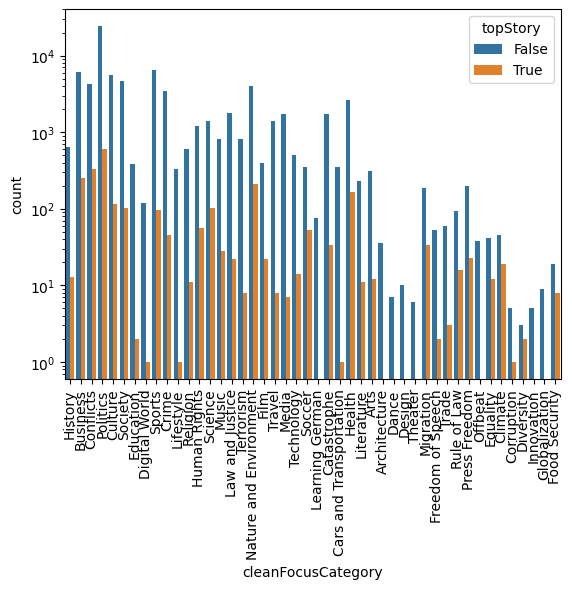

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='cleanFocusCategory', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

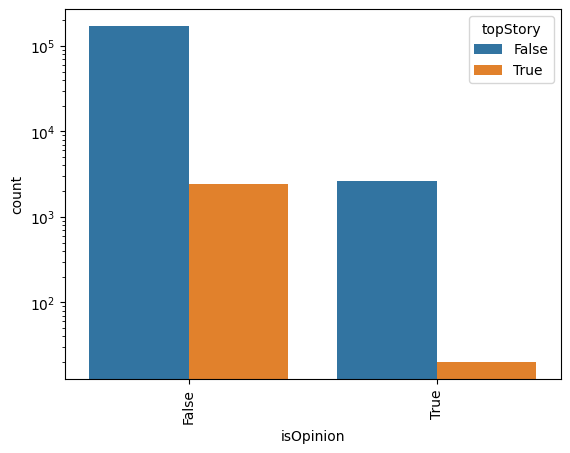

In [9]:
sns.countplot(x='isOpinion', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

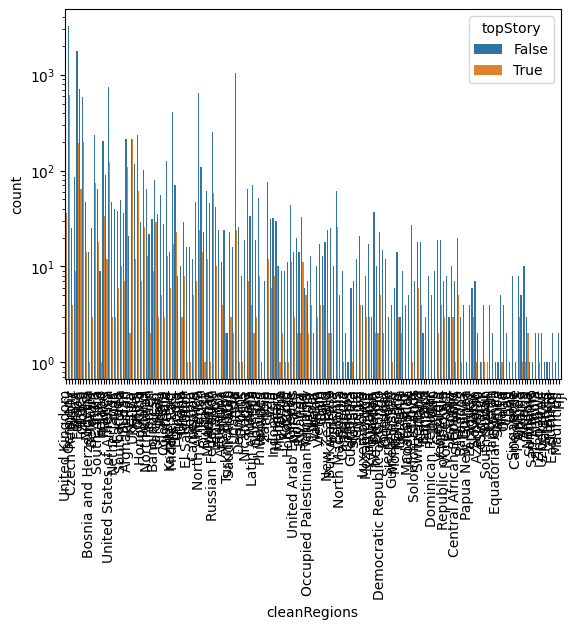

In [10]:
sns.countplot(x='cleanRegions', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [11]:
df['firstContentAssociations'] = df['contentAssociations'].apply(lambda x: x[0]['id'] if len(x) != 0 else None)
df['secondContentAssociations'] = df['contentAssociations'].apply(lambda x: x[1]['id'] if len(x) > 1 else None)
df['thirdContentAssociations'] = df['contentAssociations'].apply(lambda x: x[2]['id'] if len(x) > 2 else None)
df['fourthContentAssociations'] = df['contentAssociations'].apply(lambda x: x[3]['id'] if len(x) > 3 else None)

In [12]:
print(df['id'].isin(df['firstContentAssociations']).sum())
print(df['id'].isin(df['secondContentAssociations']).sum())
print(df['id'].isin(df['thirdContentAssociations']).sum())
print(df['id'].isin(df['fourthContentAssociations']).sum())

246
252
239
228


In [13]:
print(df.loc[df['id']==38713827,['id','teaser','contentAssociations']]) 
print(df.loc[df['id']==40340621,['id','teaser','contentAssociations']])

             id                                             teaser  \
37992  38713827  An activist in Niger is creating jobs for loca...   

                                     contentAssociations  
37992  [{'id': 40340621}, {'id': 40340622}, {'id': 40...  
              id                                             teaser  \
139595  40340621  Germany's Philipp Kohlschreiber breezed past J...   

                                      contentAssociations  
139595  [{'id': 41762019}, {'id': 41762020}, {'id': 41...  


#### Issue with contentAssociations
- Niger story (id = 38713827) associated to story on tennis

In [14]:
df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)

In [26]:
df['cleanLastModifiedDate'] = pd.to_datetime(df['lastModifiedDate'])

In [28]:
#df['cleanLastModifiedDay'] = df['cleanLastModifiedDate'].dt.strftime('%d')

In [29]:
#df['cleanLastModifiedDay'].head()

0    01
1    01
2    01
3    01
4    01
Name: cleanLastModifiedDay, dtype: object

In [56]:
test = df.loc[df['firstKeyword'] == 'Turkey','id'].groupby(df["cleanLastModifiedDate"].dt.year).count()

<AxesSubplot:xlabel='cleanLastModifiedDate', ylabel='id'>

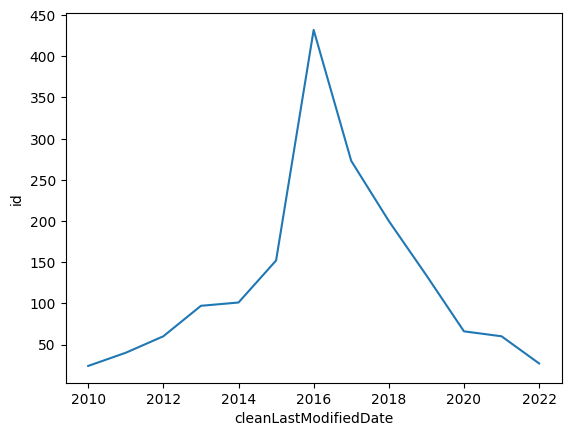

In [58]:
sns.lineplot(data=test)

In [60]:
test2 = df.loc[df['firstKeyword'] == 'Turkey','id'].groupby([df["cleanLastModifiedDate"].dt.year,df["cleanLastModifiedDate"].dt.month]).count()

In [62]:
test2.head()

cleanLastModifiedDate  cleanLastModifiedDate
2010                   1                        2
                       2                        2
                       3                        5
                       4                        1
                       5                        3
Name: id, dtype: int64

In [64]:
test3 = df

In [65]:
test3.set_index('cleanLastModifiedDate', inplace = True)

<AxesSubplot:xlabel='cleanLastModifiedDate'>

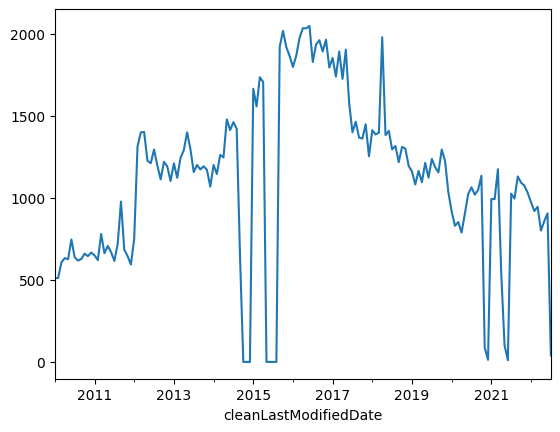

In [66]:
test3.resample('1M').count()['firstKeyword'].plot()

<AxesSubplot:xlabel='cleanLastModifiedDate'>

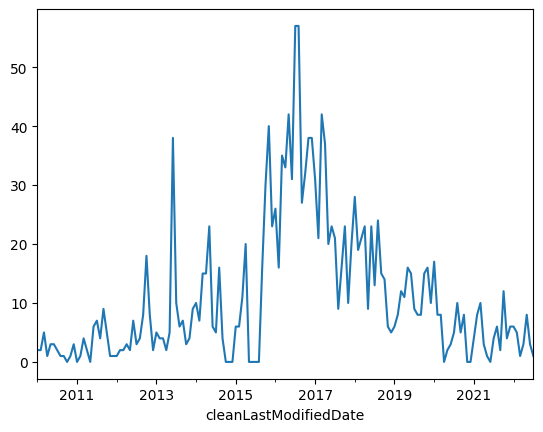

In [67]:
test3[test3['firstKeyword'] == 'Turkey'].resample('1M').count()['firstKeyword'].plot()